In [70]:
import pandas as pd

# Load both Excel files
df1 = pd.read_csv('/content/Flipkart_Mobiles.csv')
df2 = pd.read_csv('/content/Flipkart_mobile_brands_scraped_data.csv')


In [71]:
# Combining the Data
df = pd.concat([df1, df2], ignore_index=True)

In [72]:
# Inspecting the Data
print(df.info())         # Overview of data types and missing values
print(df.head())         # First few rows
print(df.describe())     # Statistical summary for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           5761 non-null   object 
 1   Model           5759 non-null   object 
 2   Color           5619 non-null   object 
 3   Memory          5676 non-null   object 
 4   Storage         5643 non-null   object 
 5   Rating          5617 non-null   float64
 6   Selling Price   5758 non-null   float64
 7   Original Price  4083 non-null   float64
dtypes: float64(3), object(5)
memory usage: 360.2+ KB
None
  Brand Model            Color Memory Storage  Rating  Selling Price  \
0  OPPO   A53  Moonlight Black   4 GB   64 GB     4.5        11990.0   
1  OPPO   A53       Mint Cream   4 GB   64 GB     4.5        11990.0   
2  OPPO   A53  Moonlight Black   6 GB  128 GB     4.3        13990.0   
3  OPPO   A53       Mint Cream   6 GB  128 GB     4.3        13990.0   
4  OPPO   A53   Electric 

In [73]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [74]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [75]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print(pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_percent}))

                Missing Count  Missing %
Brand                       0   0.000000
Model                       2   0.034716
Color                     142   2.464850
Memory                     85   1.475438
Storage                   118   2.048256
Rating                    144   2.499566
Selling_Price               3   0.052074
Original_Price           1678  29.126888


In [76]:
df = df[df['Model'].notna()]

In [77]:
print(df['Model'].isnull().sum())

0


In [78]:
df['Color'].fillna('Unknown', inplace=True)

<ipython-input-78-2537101873>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [79]:
print(df['Color'].isnull().sum())

0


In [80]:
df['Memory'].fillna('0 GB', inplace=True)


<ipython-input-80-1775758929>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [81]:
print(df['Memory'].isnull().sum())

0


In [82]:
df['Storage'].fillna('0 GB', inplace=True)
print(df['Storage'].isnull().sum())

0


<ipython-input-82-3416495317>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [83]:
df = df[df['Rating'].notna()]
print(df['Rating'].isnull().sum())

0


In [84]:
df = df[df['Selling_Price'].notna()]
print(df['Selling_Price'].isnull().sum())

0


In [85]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print(pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_percent}))

                Missing Count  Missing %
Brand                       0   0.000000
Model                       0   0.000000
Color                       0   0.000000
Memory                      0   0.000000
Storage                     0   0.000000
Rating                      0   0.000000
Selling_Price               0   0.000000
Original_Price           1673  29.811119


In [86]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Show how many duplicate rows exist
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Optionally, view the duplicates
print(duplicates.head())


Number of duplicate rows: 1058
      Brand                                Model         Color Memory Storage  \
144    OPPO                                   A5  Diamond Blue   4 GB   32 GB   
192    OPPO            Reno4 Pro Special Edition  Starry Night   8 GB  128 GB   
193    OPPO  Ravichandran Ashwin Limited Edition         Black   4 GB   64 GB   
449    ASUS                  Zenfone Max Pro M1           Blue   4 GB   64 GB   
631  realme                        X3 SuperZoom   Arctic White   8 GB  256 GB   

     Rating  Selling_Price  Original_Price  
144     4.4        15000.0         15000.0  
192     4.4        34990.0         37990.0  
193     4.4        22990.0         22990.0  
449     4.3        15599.0         15599.0  
631     4.3        29999.0         31999.0  


In [87]:
df.drop_duplicates(inplace=True)

In [88]:
print(f"New shape: {df.shape}")

New shape: (4554, 8)


In [93]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [94]:
df.shape

(4554, 8)

In [95]:
df['Discount_%'] = ((df['Original_Price'] - df['Selling_Price']) / df['Original_Price']) * 100

# Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Top 10 Brands by Count'}, ylabel='Brand'>

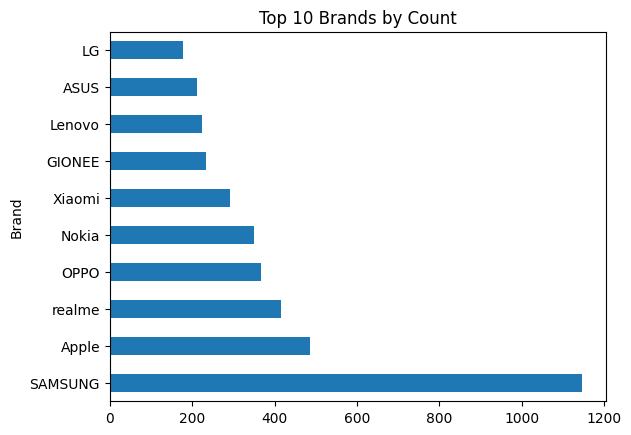

In [96]:
# Top Brands by Count
df['Brand'].value_counts().head(10).plot(kind='barh', title='Top 10 Brands by Count')

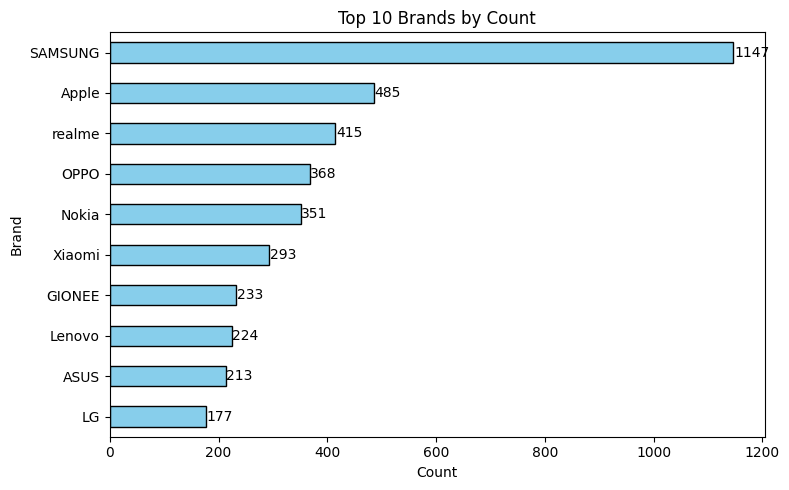

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 brands
top_brands = df['Brand'].value_counts().head(10)

# Plot
ax = top_brands.plot(
    kind='barh',
    color='skyblue',
    figsize=(8, 5),
    edgecolor='black'
)

# Invert y-axis so highest value is on top
ax.invert_yaxis()

# Add labels
for i, (value, name) in enumerate(zip(top_brands.values, top_brands.index)):
    plt.text(value + 1, i, str(value), va='center')

# Labels and title
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Top 10 Brands by Count')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Avg Selling Price by Brand'}, ylabel='Brand'>

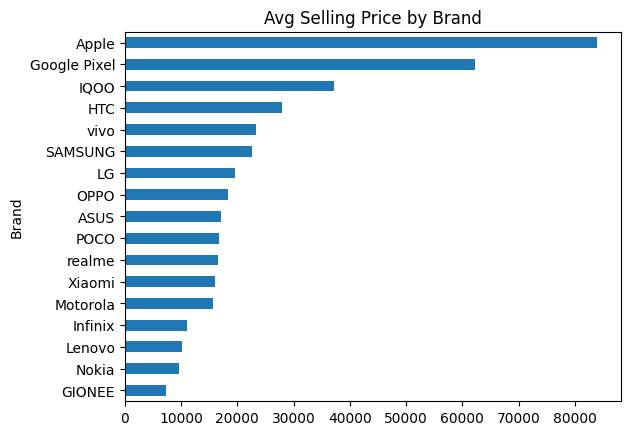

In [97]:
# Average selling Price by Brand
df.groupby('Brand')['Selling_Price'].mean().sort_values().plot(kind='barh', title='Avg Selling Price by Brand')

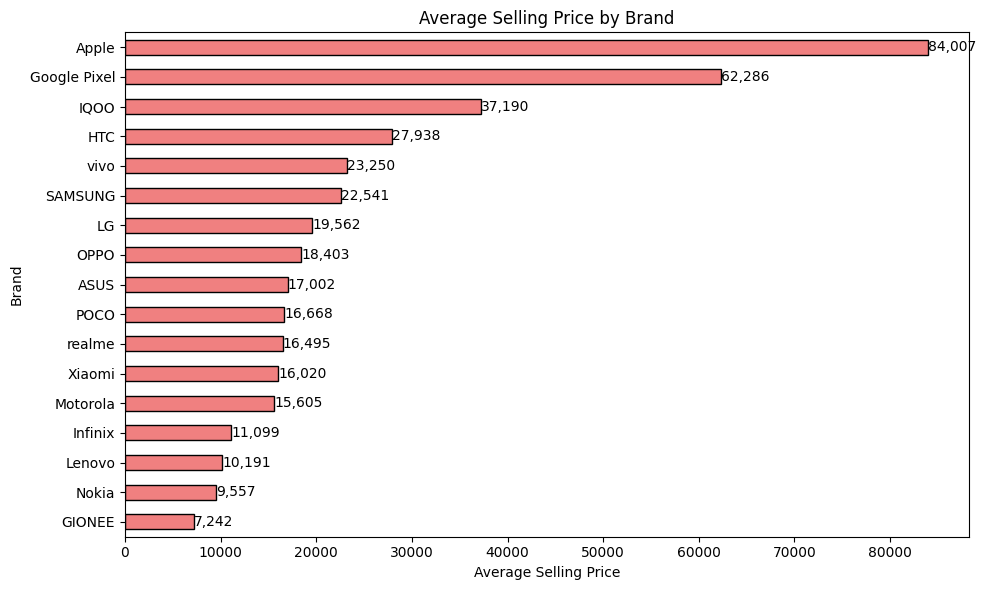

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Group, sort, and plot
avg_price = df.groupby('Brand')['Selling_Price'].mean().sort_values()

# Plot
ax = avg_price.plot(
    kind='barh',
    color='lightcoral',   # Try 'mediumseagreen', 'slateblue', etc.
    figsize=(10, 6),
    edgecolor='black'
)

# Add value labels
for i, (value, name) in enumerate(zip(avg_price.values, avg_price.index)):
    plt.text(value + 1, i, f'{value:,.0f}', va='center')  # rounded & formatted

# Title and labels
plt.xlabel('Average Selling Price')
plt.ylabel('Brand')
plt.title('Average Selling Price by Brand')
plt.tight_layout()
plt.show()


<Axes: xlabel='Rating', ylabel='Count'>

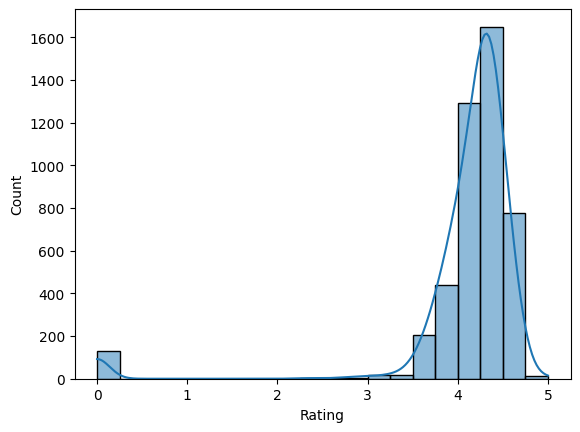

In [99]:
# count of model by rating
import seaborn as sns
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)

<Axes: >

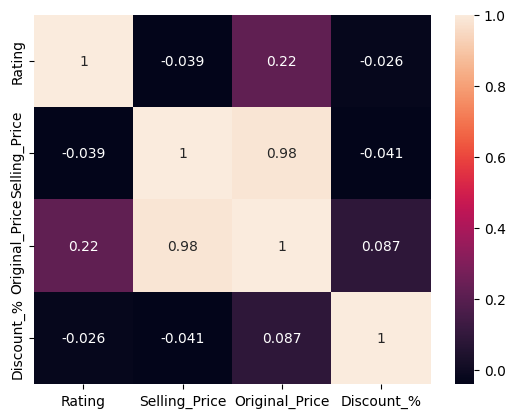

In [100]:
sns.heatmap(df[['Rating', 'Selling_Price', 'Original_Price', 'Discount_%']].corr(), annot=True)

In [101]:
def classify_segment(price):
    if price < 10000:
        return 'Low'
    elif price < 25000:
        return 'Mid'
    elif price < 40000:
        return 'Upper Mid'
    elif price < 70000:
        return 'Premium'
    else:
        return 'Ultra Premium'

df['Segment'] = df['Selling_Price'].apply(classify_segment)

In [102]:
segment_counts = df['Segment'].value_counts().sort_index()
print(segment_counts)

Segment
Low              1433
Mid              1936
Premium           376
Ultra Premium     364
Upper Mid         445
Name: count, dtype: int64


In [104]:
print(df.head())
df.to_csv('cleaned_data.csv', index=False)

  Brand Model            Color Memory Storage  Rating  Selling_Price  \
0  OPPO   A53  Moonlight Black   4 GB   64 GB     4.5        11990.0   
1  OPPO   A53       Mint Cream   4 GB   64 GB     4.5        11990.0   
2  OPPO   A53  Moonlight Black   6 GB  128 GB     4.3        13990.0   
3  OPPO   A53       Mint Cream   6 GB  128 GB     4.3        13990.0   
4  OPPO   A53   Electric Black   4 GB   64 GB     4.5        11990.0   

   Original_Price  Discount_% Segment  
0         15990.0   25.015635     Mid  
1         15990.0   25.015635     Mid  
2         17990.0   22.234575     Mid  
3         17990.0   22.234575     Mid  
4         15990.0   25.015635     Mid  


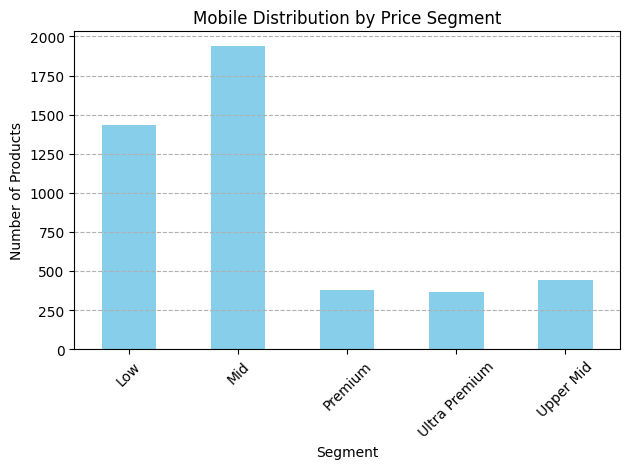

In [106]:
#Mobile Distribution by Price Segment
import matplotlib.pyplot as plt

segment_counts.plot(kind='bar', color='skyblue')
plt.title('Mobile Distribution by Price Segment')
#plt.xlabel('Price Segment')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


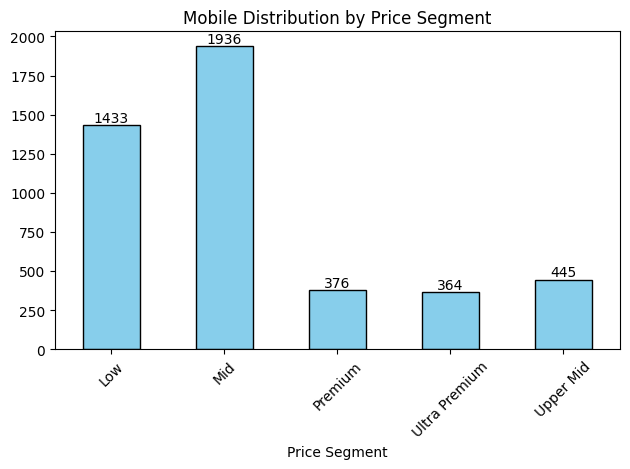

In [38]:
import matplotlib.pyplot as plt

# Plot
ax = segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Title and labels
plt.title('Mobile Distribution by Price Segment')
plt.xlabel('Price Segment')
#plt.ylabel('Number of Products')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--')

# Add value labels on top of each bar
for i, value in enumerate(segment_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [39]:
# Which brand provides the most product offerings for the Indian Market?
brand_counts = df['Brand'].value_counts()
print(brand_counts)


Brand
SAMSUNG         1147
Apple            485
realme           415
OPPO             368
Nokia            351
Xiaomi           293
GIONEE           233
Lenovo           224
ASUS             213
LG               177
Motorola         158
Infinix          150
vivo             146
POCO              74
HTC               60
Google Pixel      55
IQOO               5
Name: count, dtype: int64


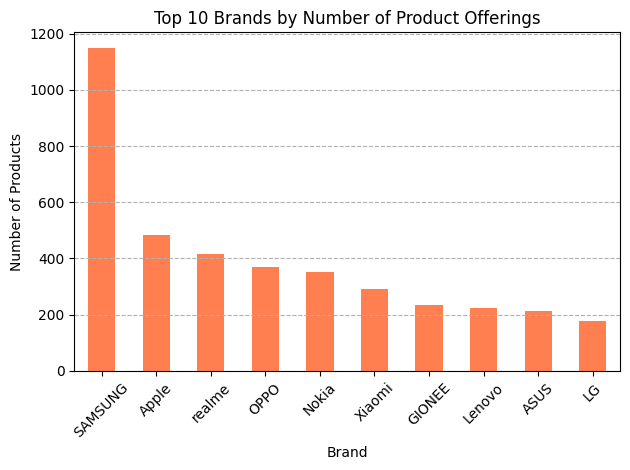

In [40]:
import matplotlib.pyplot as plt

top_brands = brand_counts.head(10)  # Top 10 brands
top_brands.plot(kind='bar', color='coral')
plt.title('Top 10 Brands by Number of Product Offerings')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


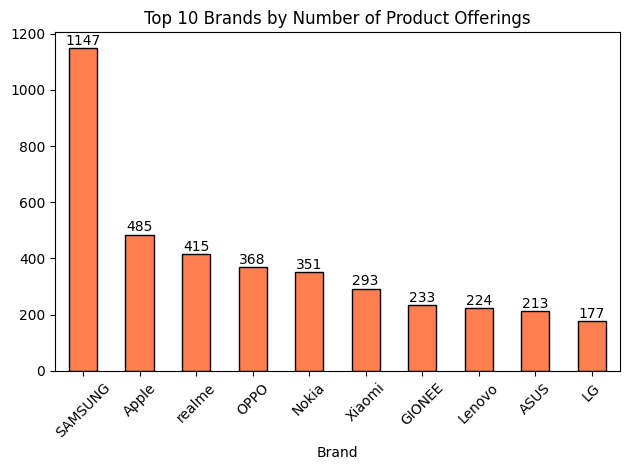

In [41]:
import matplotlib.pyplot as plt

# Top 10 brands
top_brands = brand_counts.head(10)

# Plot
ax = top_brands.plot(kind='bar', color='coral', edgecolor='black')

# Title and axis labels
plt.title('Top 10 Brands by Number of Product Offerings')
#plt.xlabel('Brand')
#plt.ylabel('Number of Products')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--')

# Add value labels on top of bars
for i, value in enumerate(top_brands.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [42]:
# Step 1: Group by Brand and count unique segments
brand_segment_coverage = df.groupby('Brand')['Segment'].nunique()

# Step 2: Get number of total unique segments in the dataset
total_segments = df['Segment'].nunique()

# Step 3: Filter brands that cover all segments
brands_all_segments = brand_segment_coverage[brand_segment_coverage == total_segments]
print(brands_all_segments)


Brand
ASUS        5
Motorola    5
SAMSUNG     5
vivo        5
Name: Segment, dtype: int64


<ipython-input-43-3495839979>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brands_all_segments.index, y=brands_all_segments.values, palette="coolwarm")


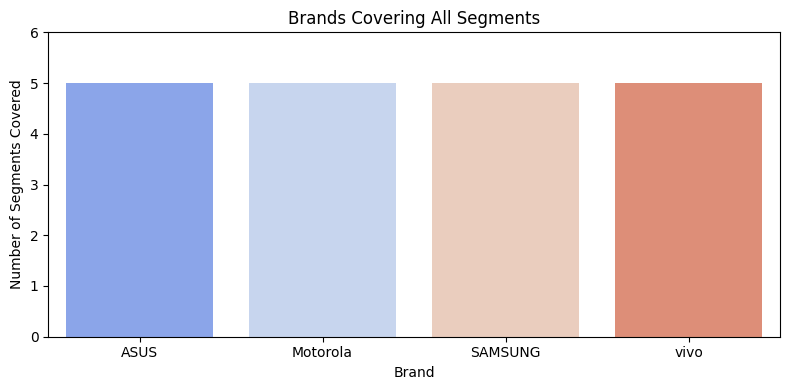

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by Brand and count unique segments
brand_segment_coverage = df.groupby('Brand')['Segment'].nunique()

# Step 2: Get number of total unique segments in the dataset
total_segments = df['Segment'].nunique()

# Step 3: Filter brands that cover all segments
brands_all_segments = brand_segment_coverage[brand_segment_coverage == total_segments]

# Step 4: Plot the result
plt.figure(figsize=(8, 4))
sns.barplot(x=brands_all_segments.index, y=brands_all_segments.values, palette="coolwarm")

plt.title('Brands Covering All Segments')
plt.ylabel('Number of Segments Covered')
plt.xlabel('Brand')
plt.ylim(0, total_segments + 1)
plt.tight_layout()
plt.show()


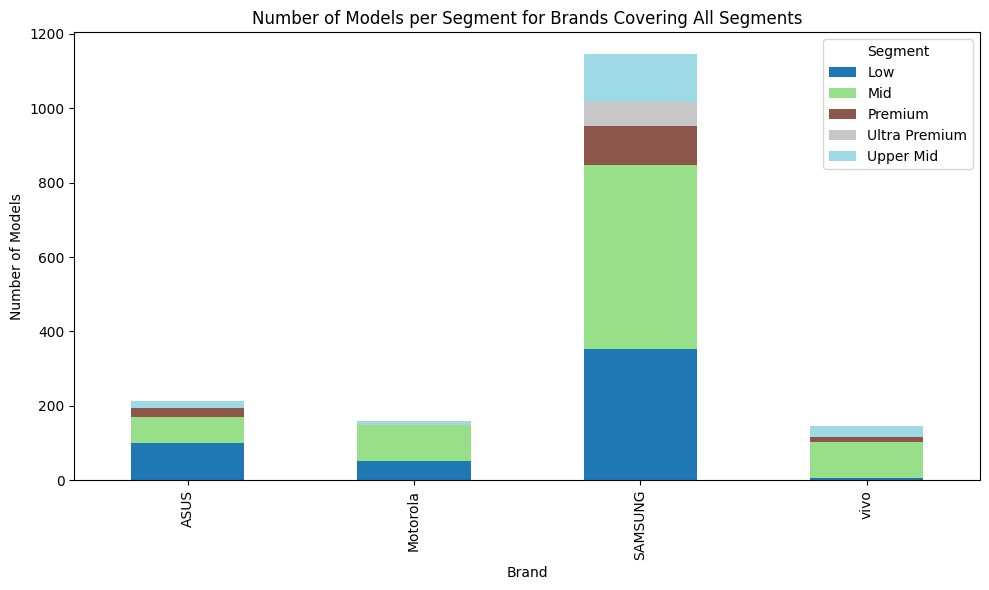

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by Brand and count unique segments
brand_segment_coverage = df.groupby('Brand')['Segment'].nunique()

# Step 2: Get number of total unique segments in the dataset
total_segments = df['Segment'].nunique()

# Step 3: Filter brands that cover all segments
brands_all_segments = brand_segment_coverage[brand_segment_coverage == total_segments].index

# Step 4: Filter dataset for those brands
filtered_df = df[df['Brand'].isin(brands_all_segments)]

# Step 5: Count number of models per Brand per Segment
brand_segment_model_counts = filtered_df.groupby(['Brand', 'Segment']).size().unstack(fill_value=0)

# Step 6: Plot stacked bar chart
brand_segment_model_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Number of Models per Segment for Brands Covering All Segments')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
#plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
# Move legend inside the plot
ax.legend(
    title='Segment',
    loc='upper left',
    bbox_to_anchor=(0.75, 0.95),
    frameon=True
)

plt.tight_layout()
plt.show()


<ipython-input-45-3214199804>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_segments + 2)  # +2 for deeper shades


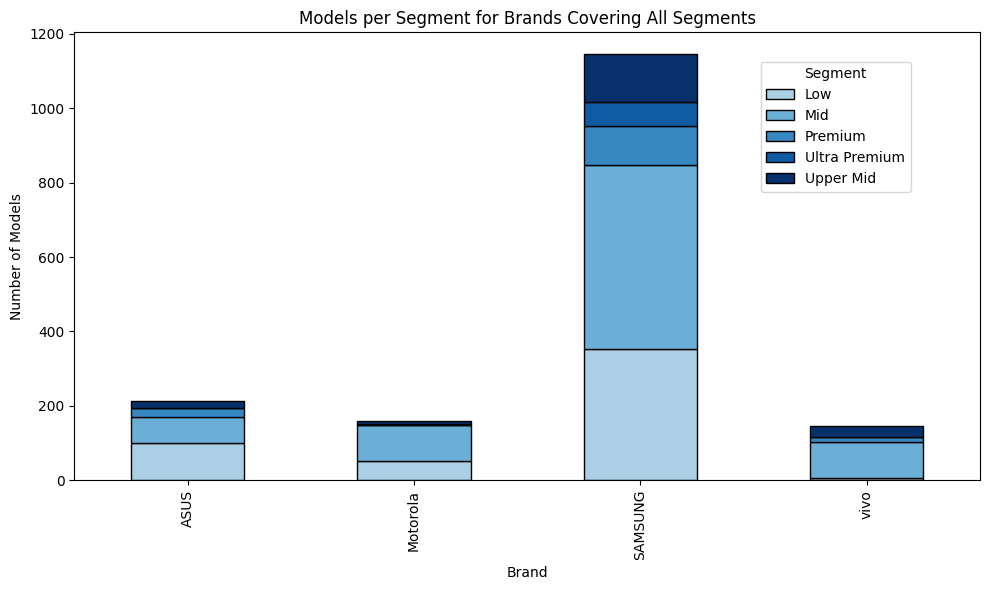

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1-5: Same as before
brand_segment_coverage = df.groupby('Brand')['Segment'].nunique()
total_segments = df['Segment'].nunique()
brands_all_segments = brand_segment_coverage[brand_segment_coverage == total_segments].index
filtered_df = df[df['Brand'].isin(brands_all_segments)]
brand_segment_model_counts = filtered_df.groupby(['Brand', 'Segment']).size().unstack(fill_value=0)

# Step 6: Custom blue colormap
import matplotlib.cm as cm
import numpy as np

# Get number of segments to generate corresponding blue shades
num_segments = brand_segment_model_counts.shape[1]
blues = cm.get_cmap('Blues', num_segments + 2)  # +2 for deeper shades
colors = [blues(i + 2) for i in range(num_segments)]  # skip very light shades

# Plot the stacked bar chart
ax = brand_segment_model_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

# Title and labels
plt.title('Models per Segment for Brands Covering All Segments')
plt.xlabel('Brand')
plt.ylabel('Number of Models')

# Move legend inside the plot
ax.legend(
    title='Segment',
    loc='upper left',
    bbox_to_anchor=(0.75, 0.95),
    frameon=True
)

plt.tight_layout()
plt.show()


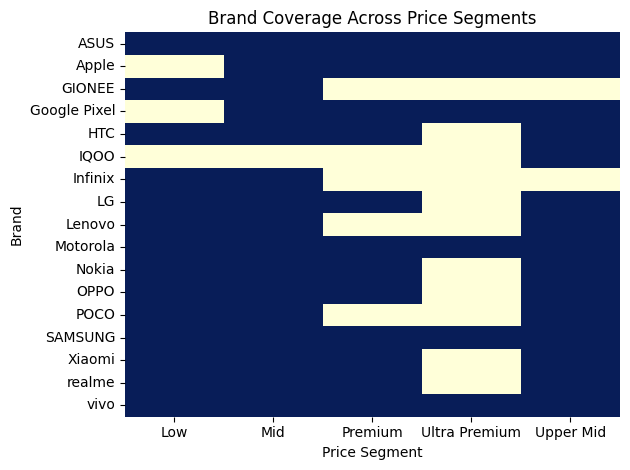

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

coverage_matrix = pd.crosstab(df['Brand'], df['Segment'])
sns.heatmap(coverage_matrix > 0, cmap='YlGnBu', cbar=False)
plt.title("Brand Coverage Across Price Segments")
plt.ylabel("Brand")
plt.xlabel("Price Segment")
plt.tight_layout()
plt.show()


In [56]:
# What specifications are the most common that are offered by various brands?
df['Spec'] = df['Memory'].str.strip() + ' / ' + df['Storage'].str.strip()

In [57]:
common_specs = df['Spec'].value_counts().head(10)
print(common_specs)

Spec
4 GB / 64 GB     764
3 GB / 32 GB     543
6 GB / 128 GB    401
2 GB / 16 GB     351
8 GB / 128 GB    303
1 GB / 8 GB      203
2 GB / 32 GB     188
6 GB / 64 GB     181
4 GB / 128 GB    156
4 GB / 32 GB     122
Name: count, dtype: int64


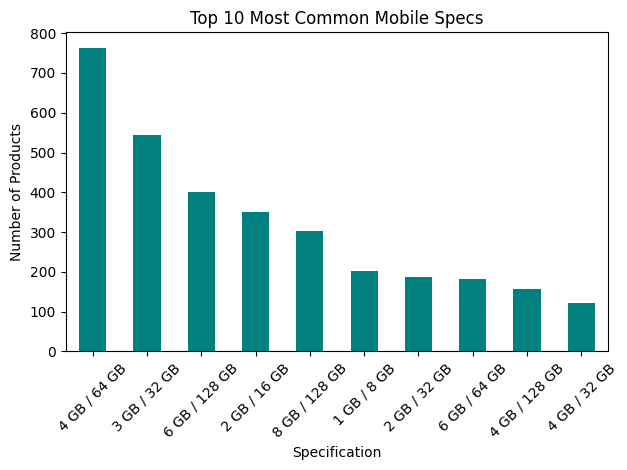

In [58]:
import matplotlib.pyplot as plt

common_specs.plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Mobile Specs')
plt.xlabel('Specification')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
top_spec_per_brand = df.groupby('Brand')['Spec'].agg(lambda x: x.value_counts().index[0])
print(top_spec_per_brand)

Brand
ASUS             3 GB / 32 GB
Apple            4GB / 256 GB
GIONEE           3 GB / 32 GB
Google Pixel     4 GB / 64 GB
HTC              2 GB / 16 GB
IQOO            8 GB / 128 GB
Infinix          4 GB / 64 GB
LG               4 GB / 64 GB
Lenovo           3 GB / 32 GB
Motorola         4 GB / 64 GB
Nokia             4 MB / 4 MB
OPPO             4 GB / 64 GB
POCO            6 GB / 128 GB
SAMSUNG         6 GB / 128 GB
Xiaomi           4 GB / 64 GB
realme           4 GB / 64 GB
vivo            8 GB / 128 GB
Name: Spec, dtype: object


In [60]:
# High-rated, common specs
df[df['Rating'] >= 4.3]['Spec'].value_counts().head(5)

,count
Spec,
4 GB / 64 GB,512
6 GB / 128 GB,286
8 GB / 128 GB,265
3 GB / 32 GB,198
6 GB / 64 GB,140


<ipython-input-61-4287618144>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specs.values, y=top_specs.index, palette='viridis')


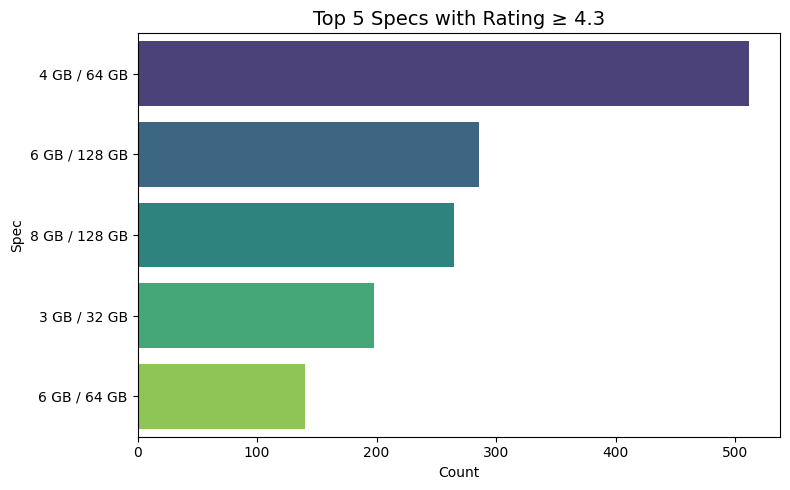

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data and compute top 5 specs
top_specs = df[df['Rating'] >= 4.3]['Spec'].value_counts().head(5)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=top_specs.values, y=top_specs.index, palette='viridis')

plt.title('Top 5 Specs with Rating ≥ 4.3', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Spec')
plt.tight_layout()
plt.show()


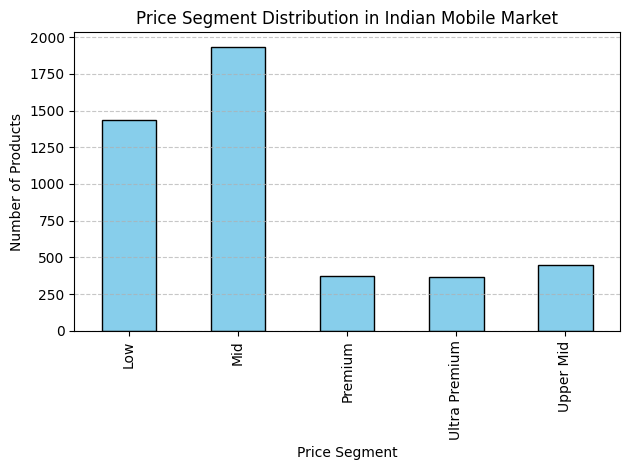

In [62]:
# Provide more detailed insights based on the data provided.
import matplotlib.pyplot as plt

segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Price Segment Distribution in Indian Mobile Market')
plt.xlabel('Price Segment')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


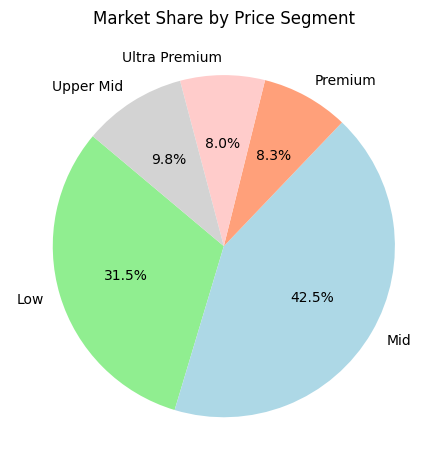

In [63]:
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                    colors=['#90ee90','#add8e6','#ffa07a','#ffcccb','#d3d3d3'])
plt.title('Market Share by Price Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [64]:
# What are the different price range segments for mobiles in India?
df['Segment'] = df['Selling_Price'].apply(classify_segment)

In [65]:
df_discounted = df[df['Original_Price'].notna()]
avg_discount = df_discounted.groupby('Brand')['Discount_%'].mean().sort_values(ascending=False)
print(avg_discount.head(10))


Brand
POCO        14.572084
Motorola    12.538830
IQOO         9.065627
LG           8.895858
realme       8.693971
OPPO         8.627528
Infinix      6.812122
GIONEE       6.348485
SAMSUNG      5.936254
Nokia        5.727744
Name: Discount_%, dtype: float64


In [66]:
import pandas as pd
import plotly.express as px

# Step 1: Filter discounted data
df_discounted = df[df['Original_Price'].notna()]

# Step 2: Compute average discount per brand
avg_discount = (
    df_discounted.groupby('Brand')['Discount_%']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 3: Create tree map
fig = px.treemap(
    avg_discount,
    path=['Brand'],
    values='Discount_%',
    color='Discount_%',
    color_continuous_scale='Blues',
    title='Top 10 Brands by Average Discount (%)'
)

fig.update_traces(textinfo="label+value+percent entry")
fig.show()


<ipython-input-68-3676794896>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




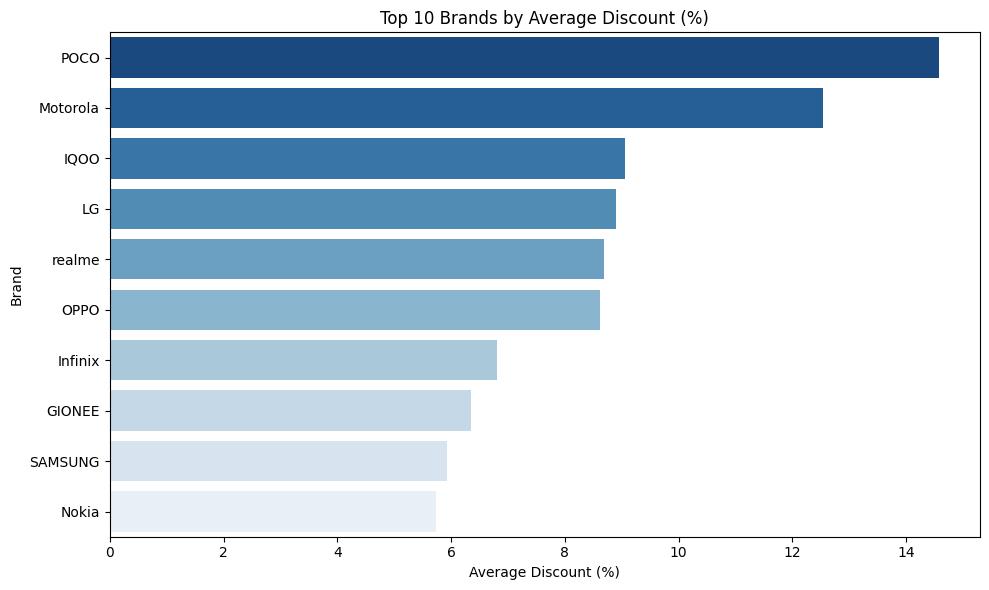

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported in this cell

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Discount_%',  # Use the column name for the x-axis
    y='Brand',       # Use the column name for the y-axis
    data=avg_discount.head(10), # Pass the DataFrame directly
    palette="Blues_r"
)

plt.title("Top 10 Brands by Average Discount (%)")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [69]:
# Brands Dominating Each Segment

segment_brand_counts = df.groupby(['Segment', 'Brand']).size().unstack().fillna(0)
top_per_segment = segment_brand_counts.apply(lambda x: x.sort_values(ascending=False).head(1))
print(top_per_segment.T)

Segment         Low    Mid  Ultra Premium  Upper Mid
Brand                                               
ASUS           99.0    NaN            NaN        NaN
Apple           NaN    NaN          264.0        NaN
GIONEE        197.0    NaN            NaN        NaN
Google Pixel    NaN    NaN           30.0        NaN
HTC             NaN   25.0            NaN        NaN
IQOO            NaN    NaN            NaN        5.0
Infinix         NaN   78.0            NaN        NaN
LG              NaN   67.0            NaN        NaN
Lenovo        147.0    NaN            NaN        NaN
Motorola        NaN   95.0            NaN        NaN
Nokia         224.0    NaN            NaN        NaN
OPPO            NaN  286.0            NaN        NaN
POCO            NaN   52.0            NaN        NaN
SAMSUNG         NaN  495.0            NaN        NaN
Xiaomi          NaN  170.0            NaN        NaN
realme          NaN  272.0            NaN        NaN
vivo            NaN   99.0            NaN     